In [1]:
%reset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.ticker as mticker
import warnings; warnings.filterwarnings('ignore')
import cmocean
from gsw import alpha, SA_from_SP, p_from_z, CT_from_pt, beta, sigma1 

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
%cd /archive/ogrp/CMIP6/OMIP/warsaw_201803_mom6_2018.04.06/OM4p25_IAF_BLING_CFC_csf/
%cd gfdl.ncrc4-intel16-prod/pp/ocean_monthly
fs=xr.open_dataset('ocean_monthly.static.nc')
deptho=fs['deptho'][:,:]
lon=fs['geolon']; lat=fs['geolat']
lonu=fs['geolon_u']; latu=fs['geolat_u']
lonv=fs['geolon_v']; latv=fs['geolat_v']
print(fs)
%cd av/monthly_5yr/

/arch9/ogrp/CMIP6/OMIP/warsaw_201803_mom6_2018.04.06/OM4p25_IAF_BLING_CFC_csf
/arch9/ogrp/CMIP6/OMIP/warsaw_201803_mom6_2018.04.06/OM4p25_IAF_BLING_CFC_csf/gfdl.ncrc4-intel16-prod/pp/ocean_monthly
<xarray.Dataset>
Dimensions:       (xh: 1440, xq: 1440, yh: 1080, yq: 1080)
Coordinates:
  * xh            (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * xq            (xq) float64 -299.6 -299.3 -299.1 -298.9 ... 59.66 59.91 60.16
  * yh            (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * yq            (yq) float64 -80.35 -80.27 -80.19 -80.11 ... 89.78 89.89 90.0
Data variables:
    geolat        (yh, xh) float32 ...
    geolat_c      (yq, xq) float32 ...
    geolon        (yh, xh) float32 ...
    geolon_c      (yq, xq) float32 ...
    Coriolis      (yq, xq) float32 ...
    areacello     (yh, xh) float32 ...
    areacello_bu  (yq, xq) float32 ...
    areacello_cu  (yh, xq) float32 ...
    areacello_cv  (yq, xh) float32 ...
    deptho        (yh, x

In [13]:
data=xr.open_dataset('ocean_monthly.2003-2007.01.nc')['time']
i=0 #month starting from 2003-01-01
a=str(data[i].values); title=a
print(title)

yearly = xr.open_mfdataset(['ocean_monthly.2003-2007.01.nc','ocean_monthly.2003-2007.02.nc','ocean_monthly.2003-2007.03.nc',\
                           'ocean_monthly.2003-2007.04.nc','ocean_monthly.2003-2007.05.nc','ocean_monthly.2003-2007.06.nc',\
                           'ocean_monthly.2003-2007.07.nc','ocean_monthly.2003-2007.08.nc','ocean_monthly.2003-2007.09.nc',\
                           'ocean_monthly.2003-2007.10.nc','ocean_monthly.2003-2007.11.nc','ocean_monthly.2003-2007.12.nc'])

spring = xr.open_mfdataset(['ocean_monthly.2003-2007.03.nc','ocean_monthly.2003-2007.04.nc','ocean_monthly.2003-2007.05.nc'])
summer = xr.open_mfdataset(['ocean_monthly.2003-2007.06.nc','ocean_monthly.2003-2007.07.nc','ocean_monthly.2003-2007.08.nc'])
fall   = xr.open_mfdataset(['ocean_monthly.2003-2007.09.nc','ocean_monthly.2003-2007.10.nc','ocean_monthly.2003-2007.11.nc'])
winter = xr.open_mfdataset(['ocean_monthly.2003-2007.12.nc','ocean_monthly.2003-2007.01.nc','ocean_monthly.2003-2007.02.nc'])
lentime=3; #how many months you are dealing with

fhist  = fall;
sfdsi=np.nanmean(fhist.variables['sfdsi'][:,:,:],axis=0)
hfds=np.nanmean(fhist.variables['hfds'][:,:,:],axis=0)
net_massout=np.nanmean(fhist.variables['net_massout'][:,:,:],axis=0)
net_massin=np.nanmean(fhist.variables['net_massin'][:,:,:],axis=0)
#net_heat_coupler=np.nanmean(fhist.variables['net_heat_coupler'][:,:,:],axis=0)
tos=np.nanmean(fhist.variables['tos'][:,:,:],axis=0)
sos=np.nanmean(fhist.variables['sos'][:,:,:],axis=0)
tob=np.nanmean(fhist.variables['tob'][:,:,:],axis=0)
sob=np.nanmean(fhist.variables['sob'][:,:,:],axis=0)

#compute the potential density referenced to 1000 dbar:
Pressure  = np.nanmean(fhist.variables['pso'][:,:,:],axis=0)
SSS = SA_from_SP(sos,Pressure,lon,lat) #absolute salinity g/kg
pot_rho_1 = xr.DataArray(sigma1(SSS, tos)) #potential density referenced to 1000dbar

Pressure_bottom  = np.nanmean(fhist.variables['pbo'][:,:,:],axis=0)
SSS_bottom = SA_from_SP(sob,Pressure_bottom,lon,lat) #absolute salinity g/kg
pot_rho_1_bottom = xr.DataArray(sigma1(SSS_bottom, tob)) #potential density referenced to 1000dbar

sob=np.nanmean(fhist.variables['sob'][:,:,:],axis=0)
MLD=np.nanmean(fhist.variables['MLD_003'][:,:,:],axis=0)
mlotstmax=np.nanmean(fhist.variables['mlotstmax'][:,:,:],axis=0)

print(fhist)




2007-01-16 12:00:00
<xarray.Dataset>
Dimensions:                 (nv: 2, time: 3, xh: 1440, xq: 1440, yh: 1080, yq: 1080, zi: 76, zl: 75)
Coordinates:
  * zi                      (zi) float64 0.0 2.0 4.0 ... 3.722e+03 6.5e+03
  * yh                      (yh) float64 -80.39 -80.31 -80.23 ... 89.84 89.95
  * zl                      (zl) float64 1.0 3.0 5.0 ... 3.591e+03 5.111e+03
  * xq                      (xq) float64 -299.6 -299.3 -299.1 ... 59.91 60.16
  * yq                      (yq) float64 -80.35 -80.27 -80.19 ... 89.89 90.0
  * xh                      (xh) float64 -299.7 -299.5 -299.2 ... 59.78 60.03
  * nv                      (nv) float64 1.0 2.0
  * time                    (time) object 2007-09-16 00:00:00 ... 2007-11-16 00:00:00
Data variables:
    pbo                     (time, yh, xh) float32 dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    pso                     (time, yh, xh) float32 dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    zos                

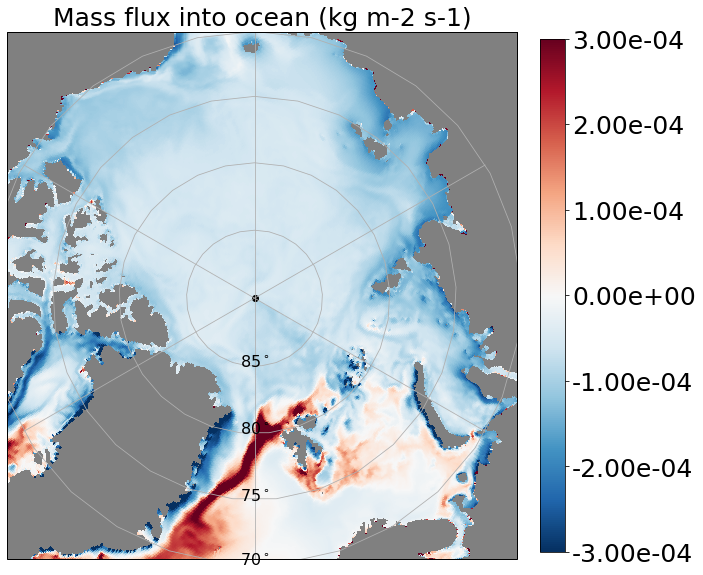

In [4]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())

plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);
plt.pcolormesh(lon, lat,net_massout+net_massin,transform=ccrs.PlateCarree(),cmap='RdBu_r',vmin=-3e-4,vmax=3.e-4);

cbar=plt.colorbar(fraction=0.046, pad=0.04,format='%.2e'); cbar.ax.tick_params(labelsize=25);
gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Mass flux into ocean (kg m-2 s-1)',fontsize=25) #positive into ocean
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree(),fontsize=16,color='black')



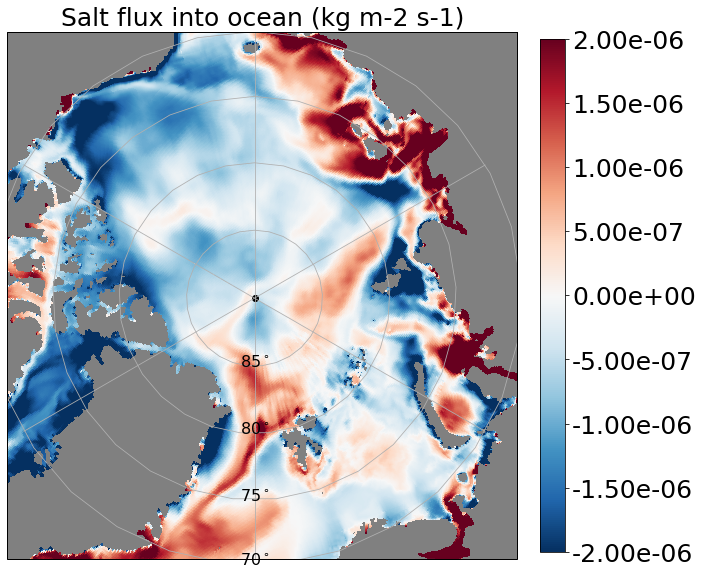

In [5]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())

plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);
plt.pcolormesh(lon, lat,sfdsi,transform=ccrs.PlateCarree(),cmap='RdBu_r',vmin=-2e-6,vmax=2.e-6);

cbar=plt.colorbar(fraction=0.046, pad=0.04,format='%.2e'); cbar.ax.tick_params(labelsize=25);
gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Salt flux into ocean (kg m-2 s-1)',fontsize=25) #positive into ocean
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree(),fontsize=16,color='black')



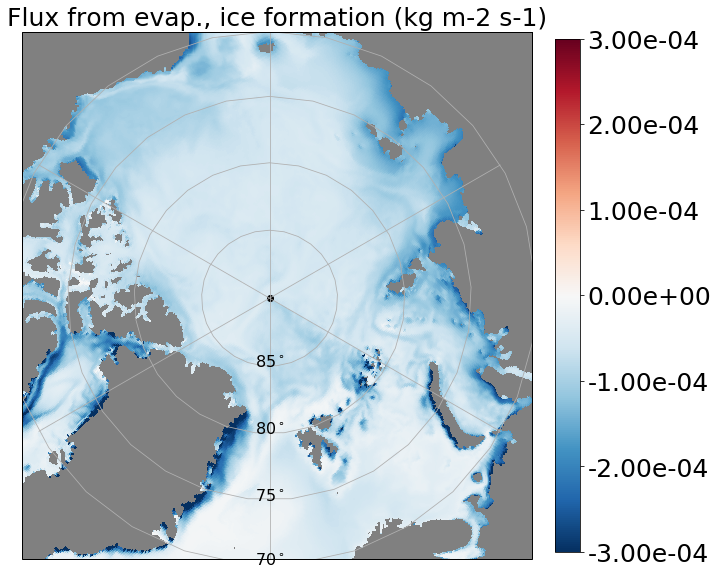

In [12]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())

plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);
plt.pcolormesh(lon, lat,net_massout,transform=ccrs.PlateCarree(),cmap='RdBu_r',vmin=-3e-4,vmax=3.e-4);

cbar=plt.colorbar(fraction=0.046, pad=0.04,format='%.2e'); cbar.ax.tick_params(labelsize=25);
gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Flux from evap., ice formation (kg m-2 s-1)',fontsize=25)
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree(),fontsize=16,color='black')



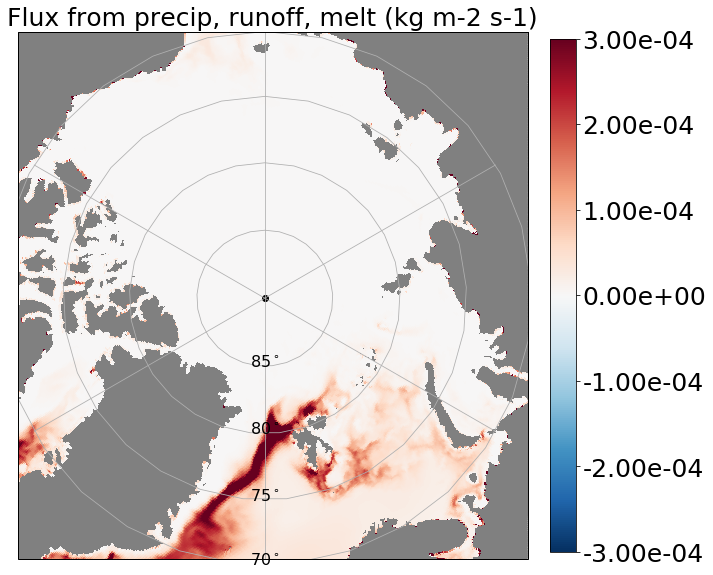

In [15]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())

plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);
plt.pcolormesh(lon, lat,net_massin,transform=ccrs.PlateCarree(),cmap='RdBu_r',vmin=-3e-4,vmax=3.e-4);

cbar=plt.colorbar(fraction=0.046, pad=0.04,format='%.2e'); cbar.ax.tick_params(labelsize=25);
gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Flux from precip, runoff, melt (kg m-2 s-1)',fontsize=25)
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree(),fontsize=16,color='black')



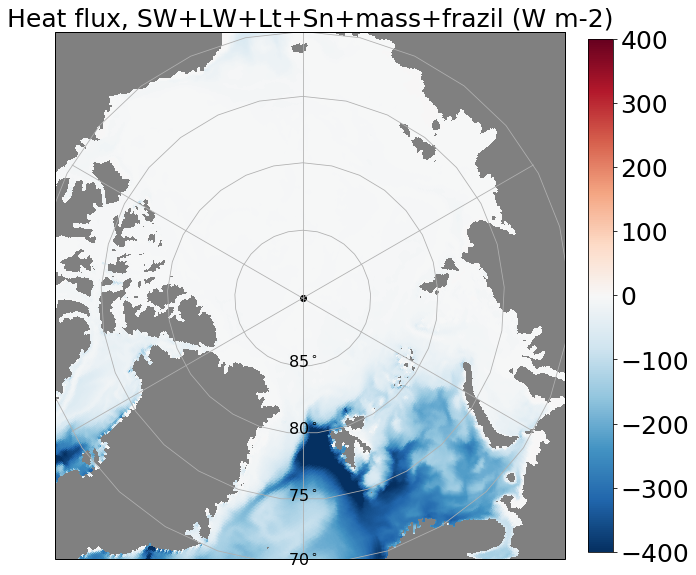

In [19]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())

plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);
plt.pcolormesh(lon, lat,hfds,transform=ccrs.PlateCarree(),cmap='RdBu_r',vmin=-400,vmax=400);

cbar=plt.colorbar(fraction=0.046, pad=0.04); cbar.ax.tick_params(labelsize=25);
gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Heat flux, SW+LW+Lt+Sn+mass+frazil (W m-2)',fontsize=25) #Positive into ocean
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree(),fontsize=16,color='black')


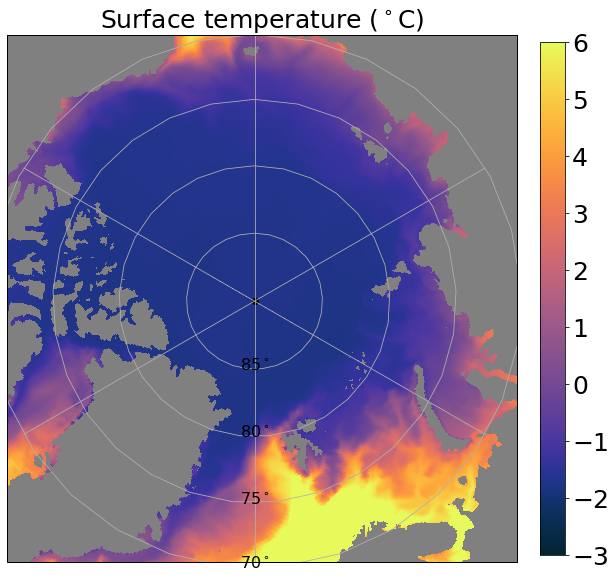

In [68]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())

plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);
plt.pcolormesh(lon, lat,tos,transform=ccrs.PlateCarree(),cmap=cmocean.cm.thermal,vmin=-3,vmax=6);

cbar=plt.colorbar(fraction=0.046, pad=0.04); cbar.ax.tick_params(labelsize=25);
gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Surface temperature ($^\circ$C)',fontsize=25)
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree(),fontsize=16,color='black')

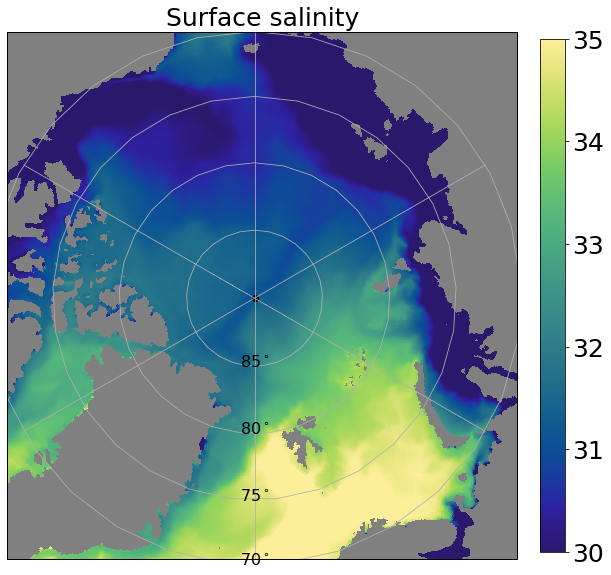

In [69]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())

plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);
plt.pcolormesh(lon, lat,sos,transform=ccrs.PlateCarree(),cmap=cmocean.cm.haline,vmin=30,vmax=35);

cbar=plt.colorbar(fraction=0.046, pad=0.04); cbar.ax.tick_params(labelsize=25);
gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Surface salinity',fontsize=25)
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree(),fontsize=16,color='black')


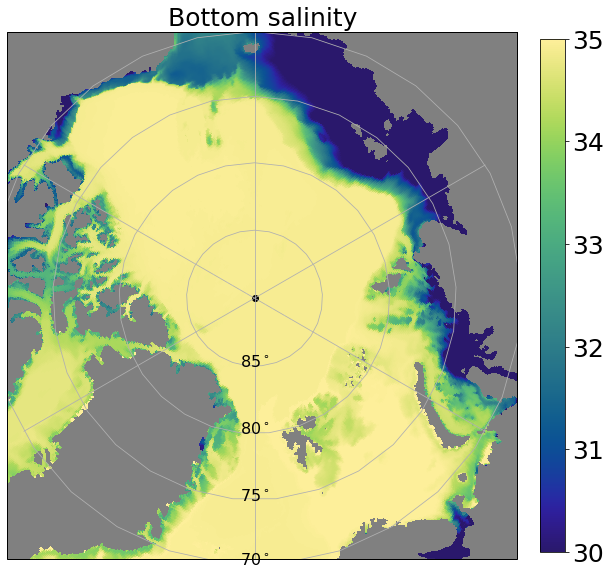

In [35]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())

plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);
plt.pcolormesh(lon, lat,sob,transform=ccrs.PlateCarree(),cmap=cmocean.cm.haline,vmin=30,vmax=35);

cbar=plt.colorbar(fraction=0.046, pad=0.04); cbar.ax.tick_params(labelsize=25);
gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Bottom salinity',fontsize=25)
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree(),fontsize=16,color='black')


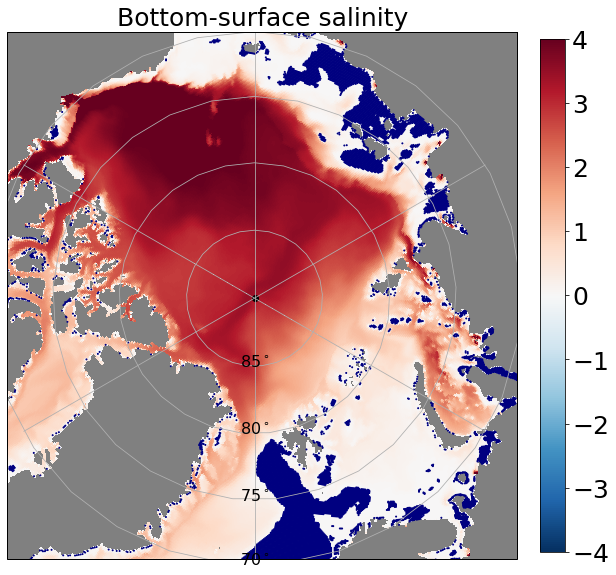

In [43]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())

plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);
plt.pcolormesh(lon, lat,sob-sos,transform=ccrs.PlateCarree(),cmap='RdBu_r',vmin=-4,vmax=4);

cbar=plt.colorbar(fraction=0.046, pad=0.04); cbar.ax.tick_params(labelsize=25);
gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Bottom-surface salinity',fontsize=25)
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])


ax.scatter(lon, lat, (sob-sos)<0,color=(0,0,0.5), transform=ccrs.PlateCarree())
ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree(),fontsize=16,color='black')


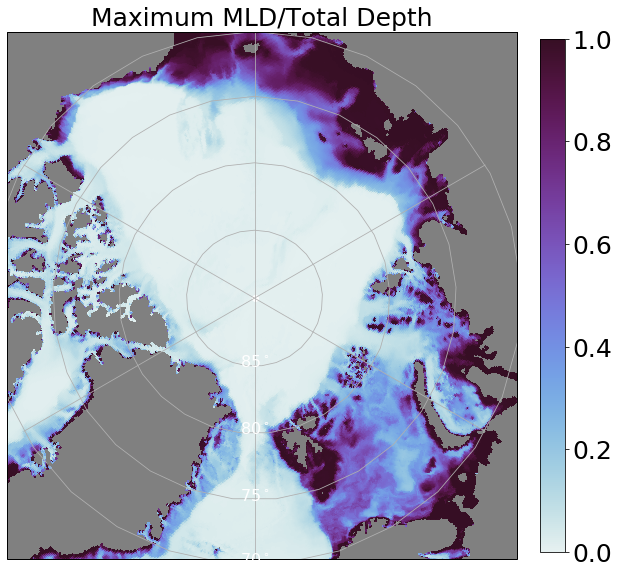

In [14]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())

plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);
PC=plt.pcolormesh(lon, lat,mlotstmax/deptho,transform=ccrs.PlateCarree(),cmap=cmocean.cm.dense,vmin=0,vmax=1);
#CT=plt.contour(lon, lat, deptho, [200], transform=ccrs.PlateCarree(),colors='k',linewidth=.5)


cbar=plt.colorbar(PC,fraction=0.046, pad=0.04); cbar.ax.tick_params(labelsize=25);
gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Maximum MLD/Total Depth',fontsize=25)
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])


ax.scatter(180, 90, marker='o',c='white', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree(),fontsize=16,color='white')


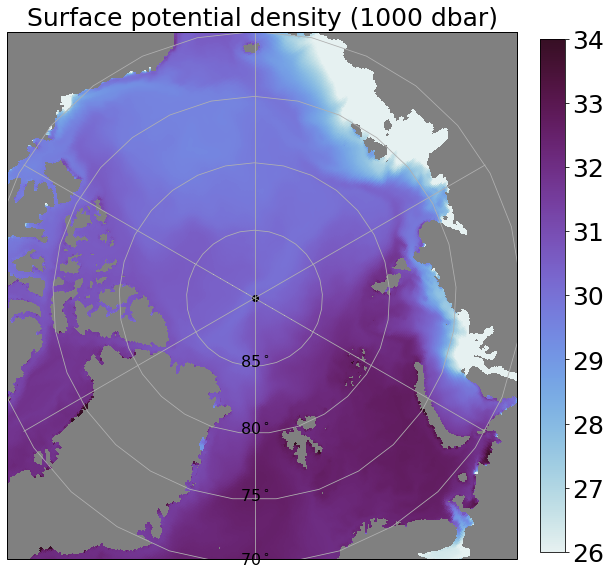

In [47]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())

plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);
plt.pcolormesh(lon, lat,pot_rho_1,transform=ccrs.PlateCarree(),cmap=cmocean.cm.dense,vmin=26,vmax=34);

cbar=plt.colorbar(fraction=0.046, pad=0.04); cbar.ax.tick_params(labelsize=25);
gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Surface potential density (1000 dbar)',fontsize=25)
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree(),fontsize=16,color='black')

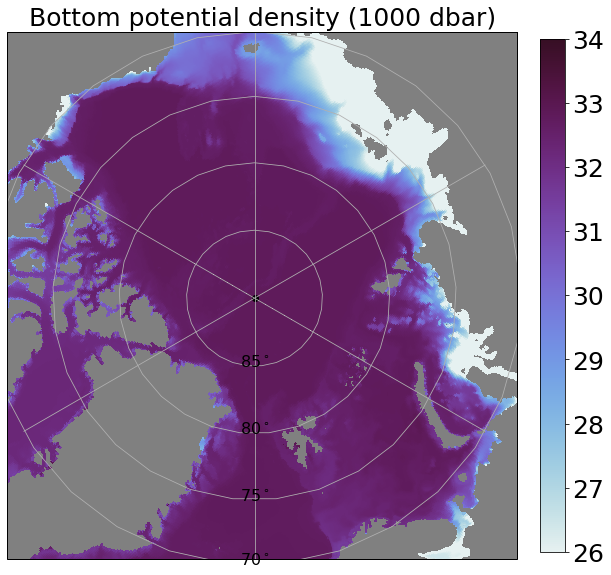

In [70]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())

plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);
plt.pcolormesh(lon, lat,pot_rho_1_bottom,transform=ccrs.PlateCarree(),cmap=cmocean.cm.dense,vmin=26,vmax=34);

cbar=plt.colorbar(fraction=0.046, pad=0.04); cbar.ax.tick_params(labelsize=25);
gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Bottom potential density (1000 dbar)',fontsize=25)
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree(),fontsize=16,color='black')